<a href="https://colab.research.google.com/github/journalWheat/CSI4106-Project1/blob/main/CSI4106_Project1_JaredWagner_GeneralForm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title: Predicting the colour of a wine using Naive Bayes, Logistic Regression, and Multi-Layer Perceptron learning algorithms**

##**GROUP 97**
####Intellectual property of JARED WAGNER (Student \#300010832), Fall 2022.
####Submitted for CSI4106, Introduction to Artificial Intelligence. 

#**Section 1: Introduction and goals**
-----
##An ode to wine
```
Hey come lets scatter flowers around,
and fill the chalice up with wine.
We'll crack the heavens' vault in half,
and hew a wholly new design. 
(Excerpt from 'Wine, Humans and Song,' translated from medieval Persian poet Hafez.)
``` 
([Source](http://poemsintranslation.blogspot.com/2015/07/hafiz-ghazal-367-human-wine-and-song.html?m=1)) + ([Info on Hafez](https://en.wikipedia.org/wiki/Hafez))

Wine, dear wine:

You have profoundly impacted the world. Though many people abstain from you, those who partake in consuming you become mind-bent by your company. Sommeliers might be the most mind-bent of us, specializing in combining their senses with their knowledge about wine's history to make appropriately fancy recommendations: what wine to pair with your salmon or your steak, what wine to bring to a house party, what wine to bring on a first date, and so on and so forth.

This is not a new phenomenon. The first evidence of grape wine production dates to 6100 years ago in an Armenian cave ([Source](https://www.decanter.com/wine-news/armenian-find-is-world-s-oldest-winery-42433/)). Dating back even further, anywhere from 9000 to 11000 years ago, there is evidence of a grape and rice wine being produced in China ([Source](https://www.sciencedirect.com/science/article/pii/S2212977418300619?via%3Dihub)). Perhaps humans' historied fixation upon wine is why in March 2020, a disputed story went viral across social media that claimed a group of elephants had broken into a village in China, "drinking 30kg of corn wine [before] they fell asleep in a nearby tea garden." ([Source](https://www.wusa9.com/article/news/verify/verify-did-elephants-get-drunk-on-corn-wine-while-humans-were-social-distancing/507-0c48ef63-33ec-478f-be6a-4ebdeb4b0299#:~:text=The%20tweet%20claimed%20the%20elephants,every%20instance%20of%20this%20post.))

Sommeliers with the most sensitive olfactory senses go on to write wine manuals (or so the story goes). These textbooks outline the expected characteristics of a feisty Australian Shiraz vs. a fruitful French Pinot Noir; a vitage from 1980 vs. the same wine produced just last year. Many of these manuals even compare wines from different regions within a country, or sub-regions within a province, state, or territory. If your Chianti didn't come from the Chianti region of Tuscany, Italy, you may be entitled to compensation as part of a class action lawsuit. 

That was a joke, but some regions like Italy, France, and even Ontario have strict regulations for wine manufacture and labelling. In-order, these are called the DOP, AOC, and VQA standards. This is to be expected, given that the wine industry is a highly profitable sector: in 2019, the Canadian wine industry alone was valued at $11.57 billion dollars. ([source](https://www.winegrowerscanada.ca/our-industry/economic-impact/))

-----
##Data and goals
The dataset used in this analysis contains samples of various Viho Verde style wines from Portugal (famous origin of "port" style wines), first published in 2009. The data was taken from Kaggle, where it had been shared from the UCI Machine Learning Repository.

This dataset is purportedly intended for models that would rank the wines, since there is an attached 'quality' metric for each sample. However, after seeing that each wine was also categorized by 'type' ('red'/'white'), this brought to mind an infamous study from 2001 ([source](http://www.daysyn.com/Morrot.pdf)) where 54 students training to become sommeliers were fooled by experimentors who had dyed white wine red. Consequently, the students described the "red white wine" as they would a red wine, even though they had previously described the same white wines entirely differently with "white wine" characteristics. Very few of the students consistently described the wine after it had been dyed, leading the researchers to suggest that the visual appearance of wine had a large affect on the participants' other senses (various news agencies were less charitable. In 2014, Gizmodo published an article "Wine tasting is bullshit. Here's why." ([Source](https://gizmodo.com/wine-tasting-is-bullshit-heres-why-496098276)) which cited the study to prove that "expert wine critics can't distinguish between red and white wines").

###The spurring of a question
Although the primary goal of this report's analysis is to compare the relative strengths of pitfalls associated with Naive Bayes, Logistic, and Multi-Layer Perceptron models, this story with the sommeliers leads to my personal tongue-in-cheek question: "can a computer guess whether a wine is red or white better than a a sommelier?" 

To answer this question, I will design three binary classification models using the aforementioned algorithms to determine whether a wine is 'white' or 'red' from the given features in the data set. From these models, I will:
- Compare and contrast the effectiveness of each model for this task.
- Explore these models with a hands-on approach.
- Compare the sommeliers' performance to "a computer's" performance, i.e. my models.

###Applications
The question "can a computer guess whether a wine is red or white better than a sommelier," although humorous, has a real-world value. On its face it has entertainment value (otherwise no articles would be written about it), but looking closer it also conjours up questions about wine curation as a profession. If a computer can be a "virtual sommelier," then one can think of all kinds of applications for that. Exploring one example, imagine filling out a questionnaire from an app on your phone about your wine preferences, and then zap! Your phone returns a list of 10 wines it thinks that you will enjoy. No hiring a specialist, no wasting time, you know exactly what you want after 2 minutes with the app. 

Of course the results of this experiment do not *directly* fit into that example, but the models designed here could be components of that application. For example, if these models characterize a white wine as a red, then this could be a clue that this "white" wine has a red-like flavor profile that will not be appreciated as much by a person who does not like red wine.

#**Section 2: Analyzing the data**
-----
In this section, the wine dataset is loaded

---- 
#BREAK: EVERYTHING BELOW MUST BE REFRACTORED
----

In [1]:
# setup for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#data source: https://www.kaggle.com/datasets/rajyellow46/wine-quality
df_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/winequalityN.csv' 
sample_location = 'https://raw.githubusercontent.com/journalWheat/CSI4106-Project1/main/sample.csv'
target = 'type'

raw_df = pd.read_csv(df_location).dropna().sample(n=len(pd.read_csv(df_location).dropna()),random_state=1)
med_sample_df = raw_df[100:601].copy() # sample of 500
small_sample_df = raw_df[:100].copy() # sample of 100

# Analyzing the data

The dataset used for this report was provided through Kaggle: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

This dataset has 6463 samples and 12 features. This is a binary classification task, because I will use this data to classify wines as 'red' or 'white.'

From the statistics below, there are no rows with missing values in this data set (since the count for each feature is equal to the count of the target).

In [2]:
# get some statistics
print(raw_df.isnull().sum())
print(raw_df.describe())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         

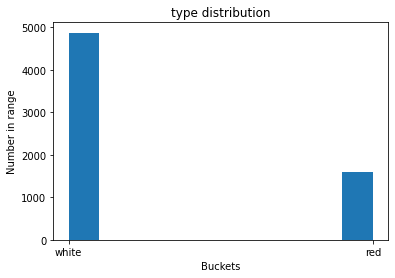

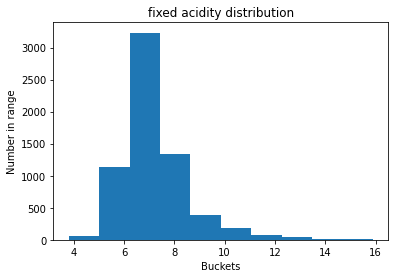

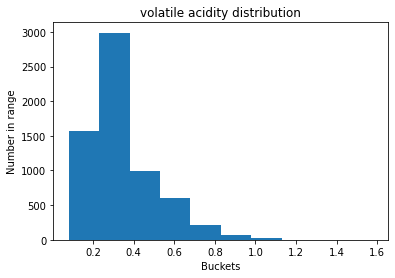

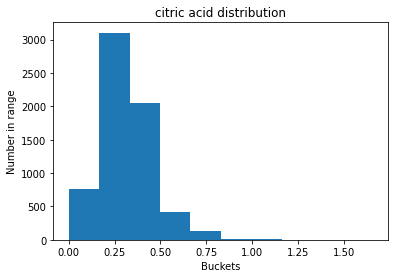

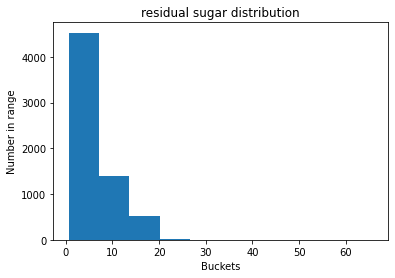

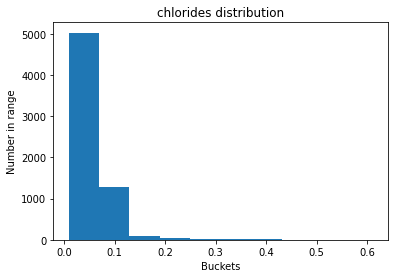

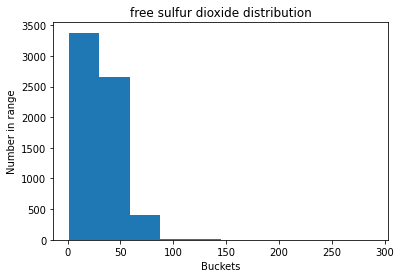

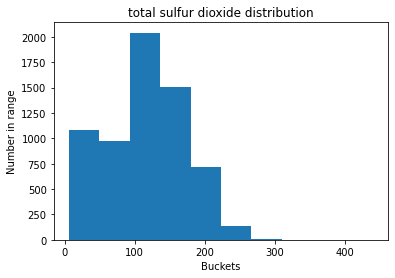

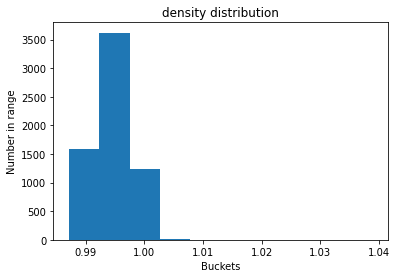

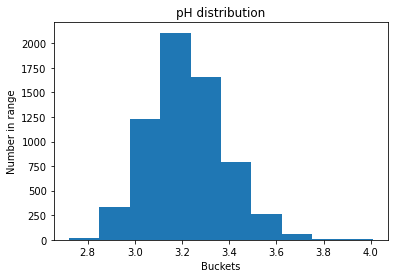

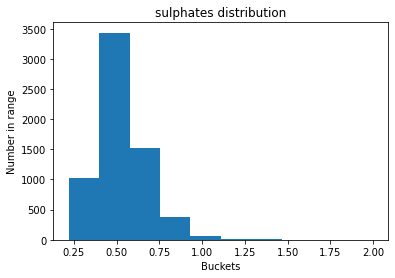

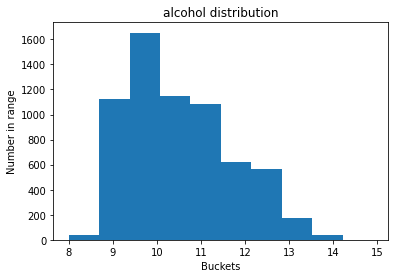

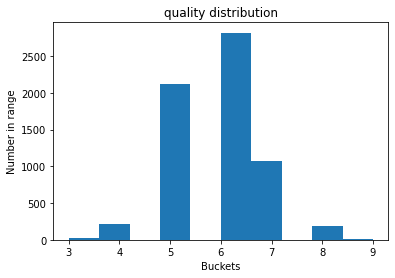

In [3]:
# plot histograms to see distributions of data
for column in raw_df:
  plt.hist(raw_df[column])
  plt.xlabel('Buckets')
  plt.ylabel('Number in range')
  plt.title(column + ' distribution')
  plt.show()

At a glance, these plots look good. There is a mix of features with relatively normal and non-normal distribution, which may help classify samples from the dataset.

This seems like a more reasonable classification system for the wines, given the limited number of samples available.

# Feature engineering
## Strategizing feature selection

The features provided in the dataset look promising, but to get an idea of whether they are actually usable I construct a scatterplot matrix.

In [4]:
# This code simply prints a scatterplot matrix for the features in a small sample of the data

#sns.set_theme(style='ticks')
#sns.pairplot(small_sample_df,hue=target)

From the scatterplot matrix, my first observation is that the data *is* separable using the class 'type.' There exist multiple plots where the two classes of wine seem to be separable by a line. This is important, because it means that the classes are probably learnable by an algorithm. However, simply selecting features from these scatterplots would be a naive approach because:
1. I can't tell which features are most important from the plots.
2. Feature selection should normally be catered to the models under consideration, and the models I will be building have unique strengths and weaknesses.
3. Some feature graphs are difficult to interpret, such as any of the plots with 'quality' as a metric.

Therefore, instead of relying on graph interpretation I choose three different analytical approaches for each training run:

- **First run:** feature selection using relative mutual information scores assigned to each feature using scikit-learn.feature_selection.mutual_info_classif(). This is a "naive approach," in the sense that the *number* of features I use will be arbitrary.
- **Second run:** recursive feature elimination, where features with the weakest predictive power are sequentially removed from a model.
- **Third run:** sequential forwards feature selection, where features with the strogest predictive power are sequentially added to a model.

These strategies were chosen by consulting the Kaggle Education module on feature engineering, as well as an article provided by Scikit-learn on feature selection. These are included under 'References' at the bottom of the page.

There are two main reasons why I selected these strategies. First, all three strategies provide an analytical framework to select features according to their predictive power. Second, they are all "different" enough (i.e. they use different underlying fitting models) that they will likely choose different features.

For each of these runs, I use a sample dataset of 600 samples which I took when I loaded the raw data. Admittedly: the size of the sample dataset is somewhat arbitrary since I did not check how many samples I would need for statistical significance.

##**First run** feature selection using mutual information scores

###Entropy and mutual information
Theory from: https://www.youtube.com/watch?v=YtebGVx-Fxw

To start with, I will use a feature utility metric to measure how strongly associated each feature is with the target variable.

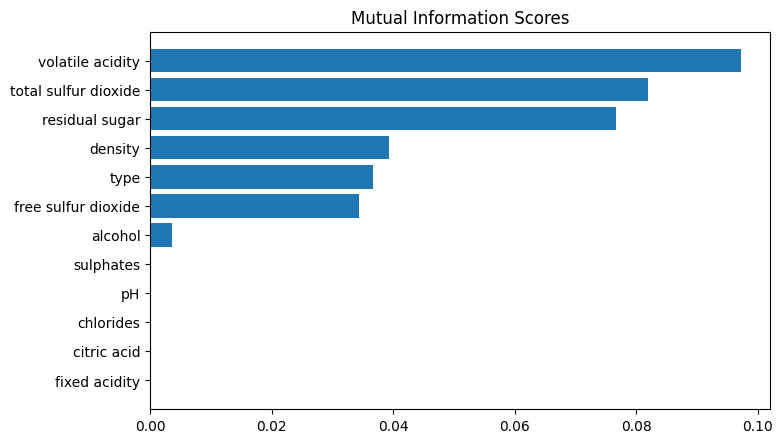

In [5]:
# NOTICE: this code is from: https://www.kaggle.com/code/ryanholbrook/mutual-information
X = small_sample_df.copy()
y = X.pop(target)

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

####################

from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

####Display
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

###Interpretation
From the bar graph, the top 4 ranked features are:
- total sulfur dioxide
- chlorides
- volatile acidity
- residual sugar

In [6]:
first_run_features = {'total sulfur dioxide','chlorides','volatile acidity','residual sugar'}

##**Second run** feature selection using recursive feature elimination

Recursive Feature Elimination works by fitting a model using all features, removing the least useful feature, and then repeating the process until a desired number of features are left. Since four features were selected in the previous section, I will also select four using this technique.

One drawback to this method for my application (fitting three different models) is that RFE optimizes feature selection to the underlying model. Since I will be using a Decision Tree Classifier as the underlying model, that means the features I select will not necessarily be the optimal features for the models I will train later.

In [7]:
# NOTICE: first, I had tried to use this code: https://www.kaggle.com/code/carlmcbrideellis/recursive-feature-elimination-rfe-example/notebook
# NOTICE: this source was also consulted on RFE: https://machinelearningmastery.com/rfe-feature-selection-in-python/
# NOTICE: last, I took some code from https://www.youtube.com/watch?v=vxdVKbAv6as
import sklearn
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
df = small_sample_df.copy()

# inputs
X = df.drop(columns=[target], axis=1)
y = df[target]
# outputs

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)

#fit the model
rfe.fit(X, y)

for i, col in zip(range(X.shape[1]), X.columns):
  print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

ValueError: ignored

From RFE, the chosen features are:
- chlorides
- total sulfur dioxide
- pH
- alcohol

In [ ]:
second_run_features = {'chlorides','total sulfur dioxide','pH','alcohol'}

##**Third Run** feature selection using sequential forward feature selection

Sequential forward feature selection is like the opposite of recursive feature elimination. Instead of building a model with all features and then removing less important features, this technique starts with the "best" feature and builds the model from there.

One main difference between this implementation of FFS vs. the implementation of RSE above is also the underlying method. For FFS, I use a Random Forest Classifier to build the model for feature selection.

In [ ]:
# code was used from: https://www.youtube.com/watch?v=POCvLGRLDzM
# also consulted the documentation for SequentialFeatureSelector: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

df = small_sample_df.copy()

# inputs
X = df.drop(columns=[target], axis=1)
y = df[target]

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_train.shape

# FFS w/ Random Forest
sfs = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1), n_features_to_select=4, direction='forward', cv=5).fit(X_train, y_train)


In [ ]:
print(sfs.get_feature_names_out())

###Interpretation
Using sequential forward feature selection with a decision tree as the underlying model, the features selected are:
- fixed acidity
- residual sugar
- total sulfur dioxide
- density

In [ ]:
third_run_features = {'fixed acidity', 'residual sugar', 'total sulfur dioxide', 'density'}

##Summary and reflection
In the previous sections, I chose the following features for each training run.

- **First run:** total sulfur dioxide, chlorides, volatile acidity, residual sugar
- **Second run:** chlorides, total sulfur dioxide, pH, alcohol
- **Third run:** fixed acidity, residual sugar, total sulfur dioxide, density

Of these features, some appeared multiple times between selection methods. In order of incidence:
- **Appeared across all selections:** total sulfur dioxide
- **Appeared across two selections:** chlorides, residual sugar
- **Appeared in only one selection:** volatile acidity, pH, alcohol, fixed acidity, density

This suggests that 'total sulfur dioxide,' 'chlorides', and 'residual sugar,' have a strong predictive value for the target variable, but that the other variables are sensitive to the underlying model. Remember that for each feature selection run, three different underlying models were used to score the predicive value of a feature. In order, these were: k-nearest neighbors, decision tree, and random forest algorithms.

The implication of this seems to be that all sets contain at least one strong predictor (total sulfur dioxide), but that the other variables will be more-or-less useful depending on the underlying model used. For example,

In [ ]:
print(first_run_features)
print(second_run_features)
print(third_run_features)

#Encoding
Each algorithm I am implementing needs to take different data. I have split this section into three subsections, each corresponding to how I am encoding the data for each algorithm. 

In each section, I also go to the liberty of encoding the data for each run. What that means is that when I finish encoding, I will end up with nine datasets total:
- run_one_bayes_df, run_two_bayes_df, run_three_bayes_df
- run_one_logistic_df, run_two_logistic_df, run_three_bayes_df
- run_one_MLP_df, run_two_MLP_df, run_three_MLP_df

Each of these datasets actually contain a subset of the data in raw_df, where:
1. I only keep the features I need for each run.
2. The data is encoded according to the rules I lay out in this section, which are designed for the specific algorithm I am training.

###Encoding for Naive Bayes
There's a big, big problem with my features: they are all continous! To tackle that problem, I'll:
1. Put the data into n equally distributed buckets corresponding to the % of samples in that range. For example, for n=3, values in the first 33% of samples are placed in bucket 1, the next 33% are placed in bucket 2, and the remaining samples are placed in bucket 3.
2. Using one-hot-encoding, transform the row into n mutually-exclusive rows with values of either 1 or 0.

I should note that point #1 has some hidden assumptions with potential consequences. By splitting the data evenly into n buckets, I am assuming that the target classes are distributed differently enough across those buckets for the condional probabilities to differentiate which target class is most likely within that range.

This is a bold assumption. What if, by chance, the data is distributed such that the most dominant target value (red) is most likely across all of the buckets for every feature? Then, the algorithm will be useless because it will always guess that the wine is red.

On the other hand: using too many buckets for the data is also a problem. Consider that keeping the data continuous is like having an infinite number of buckets, in which case the conditional probability of any particular point is equal.

In [ ]:
 # qcut: https://stackoverflow.com/questions/53963183/how-to-use-kbinsdiscretizer-to-make-continuous-data-into-bins-in-sklearn
 # get_dummies: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

def encodeForBayes (raw, target, features, n_buckets):
  # get a dataframe with the features we care about
  df = raw[features].copy()

  # use Pandas to replace the values in each dataframe with the quantile they belong to
  for column in df:
    df[column] = pd.qcut(df[column], q=(n_buckets+1), labels=False)

  # expand each column out into mutually exclusive columns
  for column in df:
    onehot_columns = pd.get_dummies(df[column], prefix=column+' ',prefix_sep='', drop_first=True)
    df = pd.concat([df, onehot_columns],axis=1)
    df = df.drop(column, axis=1)

  # add the target back at the end of the dataframe ... everything have been done inplace, so this is okay
  df = pd.concat([raw_df[target],df],axis=1)
  #df[target] = raw[target].copy()

  return df

n=4
run_one_bayes_df = encodeForBayes(raw_df, target, first_run_features, n)
run_two_bayes_df = encodeForBayes(raw_df, target, second_run_features, n)
run_three_bayes_df = encodeForBayes(raw_df, target, third_run_features, n)

# Making cuts for k-fold cross validation
###Theory
K-fold cross validation is a method used to prevent overfitting. Overfitting occurs when a model performs well on training data, but fails to perform on real data. Through this process, data is split into k groups. Then, the model is trained k times (using a different data fold k for testing). By evaluating the performance of the model on all k runs, one obtains a better understanding on the general health of the model compared to if the model had been trained and tested only once.

###Considerations for the the wine dataset

"Randomness" is a subject worth exploring before I split the data using k-fold cross validation. For some datasets where samples are dependent, randomizing the data would be innapopriate (for example, some data sets where samples are dependent on time). However, the samples in my data are independent, so I want to reflect that in each of the folds I take.

This observation might initially seem to contradict the code immediately below, where the data does not appear to be shuffled. This is because when the data was initially read from CSV, it was shuffled using a pseudorandom seed. This approach was chosen so that the work in this notebook would be reproducible. Because the data was shuffled from a seed, that means anybody can shuffle the CSV the same way as was done in this report.

###Choice of k
For this report, 10-fold cross validation was selected since it is commonly used in data science literature. Examining the impact of taking different folds could be an interesting follow-up analysis, but is outside of the scope of this report.

Theory taken from:
https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,is%20to%20be%20split%20into.

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection

In [ ]:
# Guide on KFold: https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/
# Some code in this section is from: https://www.youtube.com/watch?v=gJo0uNL-5Qw
from sklearn.model_selection import KFold

# prepare 10 splits
kf = KFold(n_splits=10, random_state=None, shuffle=False)

Now that the folds have been specified using KFold, the models are detailed below. Finally, in 'Run 1,' 'Run 2,' and 'Run 3' the models are trained applying k-fold. From these runs, statistics about each model are graphed.

#The models
The algorithms I use to train the models for each run are placed in this section.
###Naive Bayes


In [ ]:
# TERMINOLOGY
# X_train -> a training dataset with features and target variable
# X_test -> a testing dataset with features and target variable
# Y -> the name of the target variable; could also be considered a set of possible classes
# X -> a set of features
# x -> a particular feature
# y -> a particular class of the target variable

In [ ]:
# implementation using sklearn.naive_bayes.CategoricalNB
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

def naive_bayes(X_train, X_test, y_train, y_test):
  ##### MODEL
  clf = MultinomialNB(fit_prior=True)
  clf.fit(X_train, y_train)

  ##### DATA ABOUT THE ALGORITHM
  y_true = y_test
  y_pred = clf.predict(X_test)

  print("Confusion matrix; real values:")
  print(confusion_matrix(y_true,y_pred))
  print('--')
  print("Confusion matrix; normalized:")
  print(confusion_matrix(y_true,y_pred, normalize='true'))

###Logistic Regression

###Multilayer Perceptron

#Run 1: training the models

In [ ]:
print(first_run_features)

###Naive Bayes

In [ ]:
# Some code taken from: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# (specifically to assign X_train, X_test, y_train, y_test appropriately)

def naive_bayes_k_fold(df):
  iteration = 1
  X = np.array(df.drop(columns=target, axis=1).values.tolist())
  y = np.array(df[target].values.tolist())

  # code for running the K-fold split
  for train_index, test_index in kf.split(df):
    print("############Iteration: ", iteration)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    naive_bayes(X_train, X_test, y_train, y_test)
    iteration += 1


#RUN 1
df = run_one_bayes_df
naive_bayes_k_fold(df)

#NOTE THAT, the confusion matrix is of the form:
#[[true-positives false-positives]   
#[false-negatives true-negatives]]

###Logistic regression

###Multilayer Preceptron

#Run 2: training the models

In [ ]:
print(second_run_features)

###Naive Bayes

In [ ]:
#RUN 2
df = run_two_bayes_df
naive_bayes_k_fold(df)

###Logistic Regression

###Multilayer Perceptron


#Run 3: training the models

In [ ]:
print(third_run_features)

###Naive Bayes

In [ ]:
#RUN 3
df = run_three_bayes_df
naive_bayes_k_fold(df)

###Logistic Regression

###Multilayer Perceptron

# References

Data source: https://www.kaggle.com/datasets/rajyellow46/wine-quality

Feature utility metric reference: https://www.kaggle.com/code/ryanholbrook/mutual-information

Categorical variables: https://www.kaggle.com/code/alexisbcook/categorical-variables/tutorial

https://www.kaggle.com/code/ryanholbrook/mutual-information

(Reference on feature selection: https://scikit-learn.org/stable/modules/feature_selection.html)

https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a

Kaggle feature engineering tutorials: https://www.kaggle.com/learn/feature-engineering

# DISCLOSURE

This is the third dataset I selected for this project. Since there may have been influence on this iteration by the work I did on my last two datasets, I have included references to the resources I used in the first iteration of this project under "Works Cited."

Iteration 1 is also available on Github: https://github.com/journalWheat/CSI4106Project1-JaredWagner

As well as iteration 2: 
https://github.com/journalWheat/CSI4106-Project1-JaredWagner-WaterPotability